In [2]:

!pip install scikit-fuzzy

In [3]:
#Importar librerías
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [138]:
# Variables de entrada
ahorros = ctrl.Antecedent(np.arange(0, 501, 1), 'ahorros')
salario = ctrl.Antecedent(np.arange(0, 16, 1), 'salario')

# Variables de salida
prob_pref = ctrl.Consequent(np.arange(0, 101, 1), 'prob_pref')

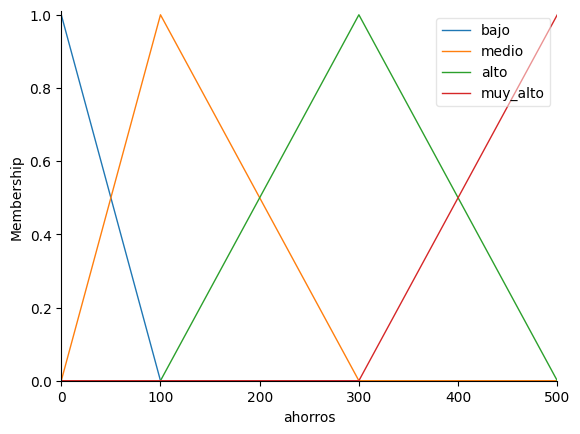

In [139]:
# Funciones de membresía para ahorros
ahorros['bajo'] = fuzz.trimf(ahorros.universe, [0, 0, 100])
ahorros['medio'] = fuzz.trimf(ahorros.universe, [0, 100, 300])
ahorros['alto'] = fuzz.trimf(ahorros.universe, [100, 300, 500])
ahorros['muy_alto'] = fuzz.trimf(ahorros.universe, [300, 500, 500])

ahorros.view()

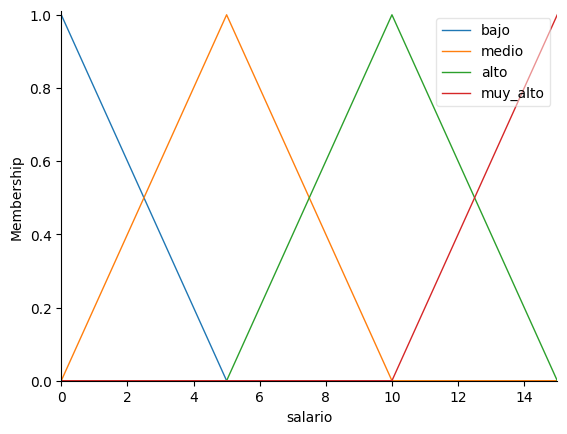

In [140]:
# Funciones de membresía para salario
salario['bajo'] = fuzz.trimf(salario.universe, [0, 0, 5])
salario['medio'] = fuzz.trimf(salario.universe, [0, 5, 10])
salario['alto'] = fuzz.trimf(salario.universe, [5, 10, 15])
salario['muy_alto'] = fuzz.trimf(salario.universe, [10, 15, 15])

salario.view()

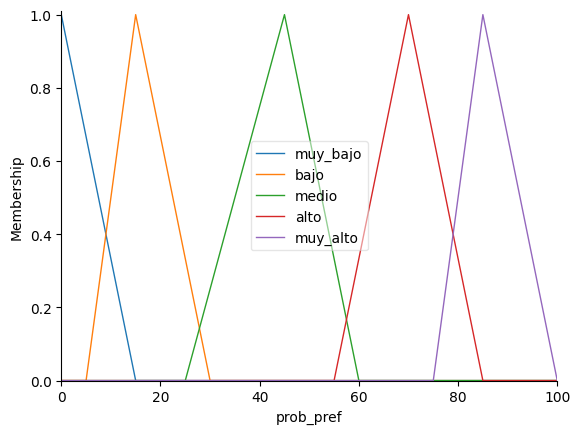

In [141]:
# Funciones de membresía para la probabilidad de ser cliente referencial
prob_pref['muy_bajo'] = fuzz.trimf(prob_pref.universe, [0, 0, 15])
prob_pref['bajo'] = fuzz.trimf(prob_pref.universe, [5, 15, 30])
prob_pref['medio'] = fuzz.trimf(prob_pref.universe, [25, 45, 60])
prob_pref['alto'] = fuzz.trimf(prob_pref.universe, [55, 70, 85])
prob_pref['muy_alto'] = fuzz.trimf(prob_pref.universe, [75, 85, 100])


prob_pref.view()

In [154]:
# Reglas difusas
rule11 = ctrl.Rule(ahorros['muy_alto'] & salario['muy_alto'], prob_pref['muy_alto'])
rule12 = ctrl.Rule(ahorros['muy_alto'] & salario['alto'], prob_pref['alto'])
rule13 = ctrl.Rule(ahorros['muy_alto'] & salario['medio'], prob_pref['alto'])
rule14 = ctrl.Rule(ahorros['muy_alto'] & salario['bajo'], prob_pref['medio'])

rule21 = ctrl.Rule(ahorros['alto'] & salario['muy_alto'], prob_pref['alto'])
rule22 = ctrl.Rule(ahorros['alto'] & salario['alto'], prob_pref['alto'])
rule23 = ctrl.Rule(ahorros['alto'] & salario['medio'], prob_pref['alto'])
rule24 = ctrl.Rule(ahorros['alto'] & salario['bajo'], prob_pref['medio'])

rule31 = ctrl.Rule(ahorros['medio'] & salario['muy_alto'], prob_pref['alto'])
rule32 = ctrl.Rule(ahorros['medio'] & salario['alto'], prob_pref['alto'])
rule33 = ctrl.Rule(ahorros['medio'] & salario['medio'], prob_pref['medio'])
rule34 = ctrl.Rule(ahorros['medio'] & salario['bajo'], prob_pref['bajo'])

rule41 = ctrl.Rule(ahorros['bajo'] & salario['muy_alto'], prob_pref['alto'])
rule42 = ctrl.Rule(ahorros['bajo'] & salario['alto'], prob_pref['medio'])
rule43 = ctrl.Rule(ahorros['bajo'] & salario['medio'], prob_pref['muy_bajo'])
rule44 = ctrl.Rule(ahorros['bajo'] & salario['bajo'], prob_pref['muy_bajo'])

sistema_control = ctrl.ControlSystem([rule11, rule12, rule13, rule14,rule21, rule22, rule23, rule24,rule31, rule32, rule33, rule34,rule41, rule42, rule43, rule44])
controlador = ctrl.ControlSystemSimulation(sistema_control)


In [155]:
# Ejemplos
# Adriana
#La probabilidad de ser cliente preferencial si el salario es 15 millones y los ahorros son de 500 millones
controlador.input['ahorros'] = 500
controlador.input['salario'] = 15
controlador.compute()
print(f"La probabilidad de ser cliente preferencial es: {controlador.output['prob_pref']} % ") #90


La probabilidad de ser cliente preferencial es: 86.66666666666669 % 


In [156]:
# Nelson
#La probabilidad de ser cliente preferencial si el salario es 9 millones y los ahorros son de 30 millones
controlador.input['ahorros'] = 30
controlador.input['salario'] = 9
controlador.compute()
print(f"La probabilidad de ser cliente preferencial es: {controlador.output['prob_pref']} % ") #60


La probabilidad de ser cliente preferencial es: 47.11288244766504 % 


In [157]:
# Federico
#La probabilidad de ser cliente preferencial si el salario es 1.16 millones y los ahorros son de 40 millones
controlador.input['ahorros'] = 40
controlador.input['salario'] = 1.16
controlador.compute()
print(f"La probabilidad de ser cliente preferencial es: {controlador.output['prob_pref']} % ") # 20.0


La probabilidad de ser cliente preferencial es: 23.499082200966672 % 


In [158]:
# Verónica
#La probabilidad de ser cliente preferencial si el salario es 1.5 millones y los ahorros son de 0 millones
controlador.input['ahorros'] = 0
controlador.input['salario'] = 1.5
controlador.compute()
print(f"La probabilidad de ser cliente preferencial es: {controlador.output['prob_pref']} % ") #5

La probabilidad de ser cliente preferencial es: 5.346153846153845 % 
